In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [4]:

x= np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x)

In [6]:
kmeans

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [8]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [9]:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [10]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [7]:
x,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=15)

In [8]:
x.shape

(1000, 2)

In [9]:
y.shape

(1000,)

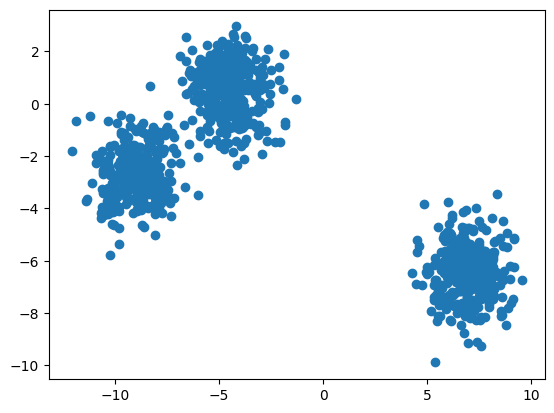

In [10]:
plt.scatter(x[:,0],x[:,1])

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=25)

In [20]:
wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(x_train)
    wcss.append(kmean.inertia_)

/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [21]:
wcss

[4576.230303521855,
 1354.9609316670872,
 1192.325387546673,
 1037.5503901081072,
 890.2985079016784,
 779.0036788229186,
 689.8113564945413,
 601.1260729935376,
 548.0233300228331]

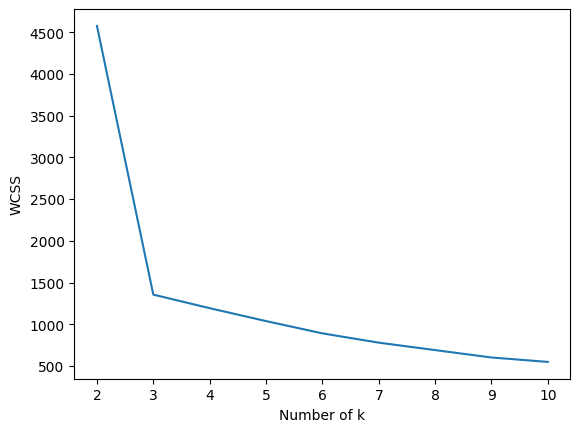

In [22]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("Number of k")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [25]:
y_labels=kmeans.fit_predict(x_train)

/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


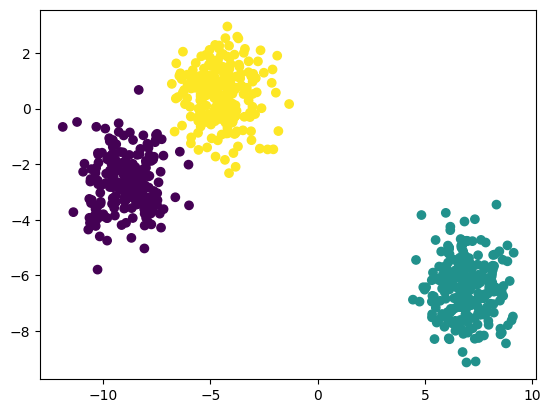

In [27]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [31]:
from kneed import KneeLocator

In [33]:
k=KneeLocator(range(2,11),wcss,curve="convex",direction="decreasing")

In [34]:
k.elbow

3

In [11]:
from sklearn.metrics import silhouette_score

In [13]:
silhouete_score=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,init="k-means++")
    kmean.fit(x_train)
    score=silhouette_score(x_train,kmean.labels_)
    silhouete_score.append(score)

/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/shahabas/anaconda3/envs/jidoka_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

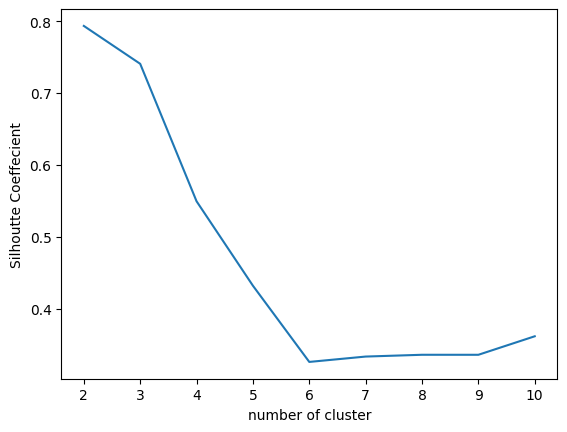

In [15]:
plt.plot(range(2,11),silhouete_score)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()